In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import random


In [2]:

transactions = pd.read_csv("./data/creditcard.csv")
transactions.drop(columns=['Time'], inplace=True)

transactions.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
fraud = transactions.loc[transactions['Class'] == 1]
notFraud = transactions.loc[transactions['Class'] == 0]

print("Fraud size: ", fraud.size)
print("Not Fraud size: ", notFraud.size)



Fraud size:  14760
Not Fraud size:  8529450


In [4]:

desFraud = fraud.describe()
desFraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [5]:
desNotFraud = notFraud.describe()
desNotFraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [6]:
### Compare the Faurd and Normal Description

In [7]:
myPD = pd.DataFrame()

for i in range(28):    
    myID = str(i+1)
    myPD["F_"+myID] = desFraud["V"+myID]
    myPD["N_"+myID] = desNotFraud["V"+myID]    

myPD = myPD.drop('count')

myPD


,F_1,N_1,F_2,N_2,F_3,N_3,F_4,N_4,F_5,N_5,...,F_24,N_24,F_25,N_25,F_26,N_26,F_27,N_27,F_28,N_28
mean,-4.771948,0.008258,3.623778,-0.006271,-7.033281,0.012171,4.542029,-0.007860,-3.151225,0.005453,...,-0.105130,0.000182,0.041449,-0.000072,0.051648,-0.000089,0.170575,-0.000295,0.075667,-0.000131
std,6.783687,1.929814,4.291216,1.636146,7.110937,1.459429,2.873318,1.399333,5.372468,1.356952,...,0.515577,0.605776,0.797205,0.520673,0.471679,0.482241,1.376766,0.399847,0.547291,0.329570
min,-30.552380,-56.407510,-8.402154,-72.715728,-31.103685,-48.325589,-1.313275,-5.683171,-22.105532,-113.743307,...,-2.028024,-2.836627,-4.781606,-10.295397,-1.152671,-2.604551,-7.263482,-22.565679,-1.869290,-15.430084
25%,-6.036063,-0.917544,1.188226,-0.599473,-8.643489,-0.884541,2.373050,-0.850077,-4.792835,-0.689398,...,-0.436809,-0.354425,-0.314348,-0.317145,-0.259416,-0.327074,-0.020025,-0.070852,-0.108868,-0.052950
50%,-2.342497,0.020023,2.717869,0.064070,-5.075257,0.182158,4.177147,-0.022405,-1.522962,-0.053457,...,-0.060795,0.041082,0.088371,0.016417,0.004321,-0.052227,0.394926,0.001230,0.146344,0.011199
75%,-0.419200,1.316218,4.971257,0.800446,-2.276185,1.028372,6.348729,0.737624,0.214562,0.612181,...,0.285328,0.439869,0.456515,0.350594,0.396733,0.240671,0.826029,0.090573,0.381152,0.077962
max,2.132386,2.454930,22.057729,18.902453,2.250210,9.382558,12.114672,16.875344,11.095089,34.801666,...,1.091435,4.584549,2.208209,7.519589,2.745261,3.517346,3.052358,31.612198,1.779364,33.847808


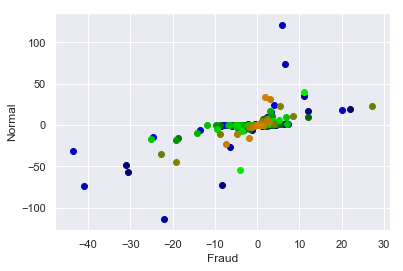

In [8]:
from random import randint
colors = []

for j in range(3):
    for i in range(10):
        if j == 0:
            colors.append((0,0,i*0.06+.4))
        if j == 1:
            colors.append((0, i*0.06+.4, 0))
        if j == 2:
            colors.append((i*0.06+.4, 0.5, 0))
    

for i in range(28):
    plt.scatter(myPD['F_' + str(i+1)], myPD['N_'+ str(i+1)], color=colors[i])

plt.xlabel('Fraud')
plt.ylabel('Normal')
plt.show()

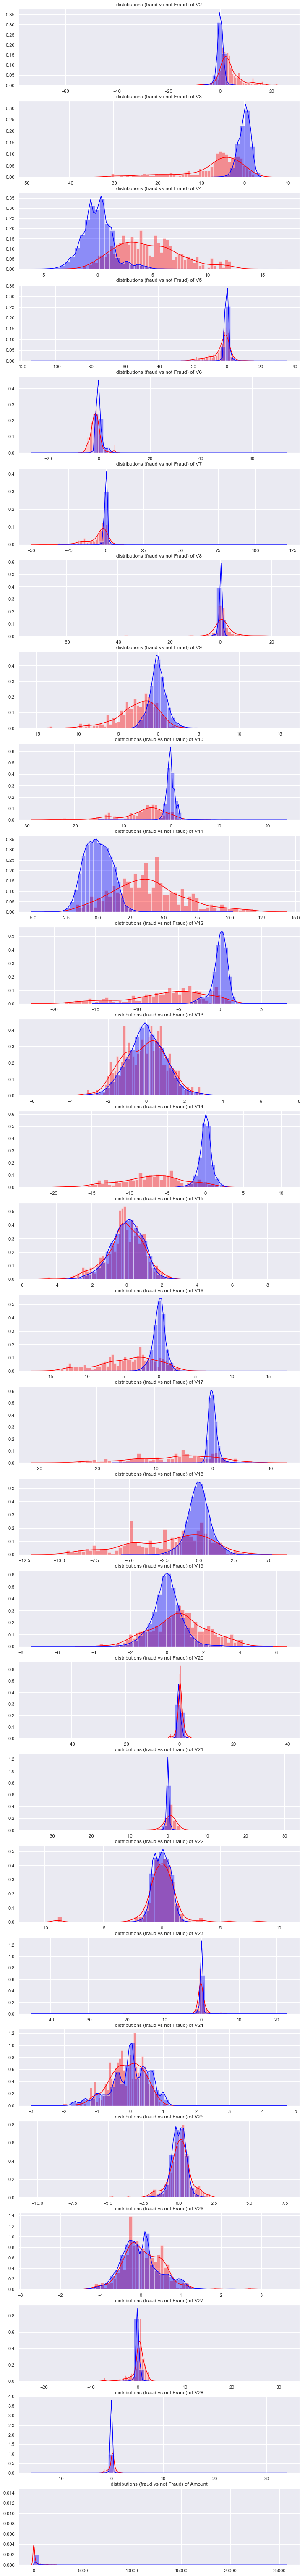

In [9]:
bins = 50
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
Vfeatures = transactions.iloc[:,1:29].columns
for i, V in enumerate(transactions[Vfeatures]):
    ax = plt.subplot(gs[i])
    sns.distplot(transactions[V][transactions.Class == 1], bins = bins, norm_hist = True, color = 'red')
    sns.distplot(transactions[V][transactions.Class == 0], bins = bins, norm_hist = True, color = 'blue')
    ax.set_xlabel('')
    ax.set_title('distributions (fraud vs not Fraud) of ' + str(V))
plt.show()

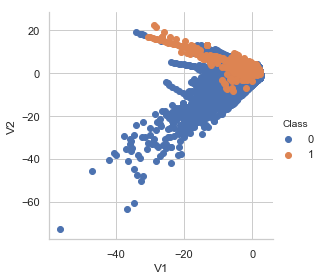

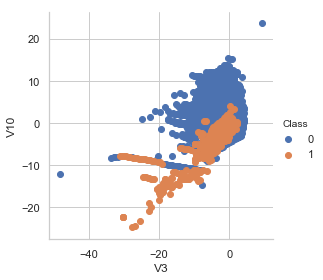

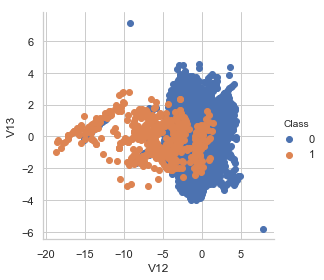

In [10]:
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(transactions, hue="Class", height=4) \
   .map(plt.scatter, "V1", "V2") \
   .add_legend()
plt.show()

sns.FacetGrid(transactions, hue="Class", height=4) \
   .map(plt.scatter, "V3", "V10") \
   .add_legend()
plt.show()


sns.FacetGrid(transactions, hue="Class", height=4) \
   .map(plt.scatter, "V12", "V13") \
   .add_legend()
plt.show()

In [11]:
x = transactions.iloc[:, :-1]
y = transactions['Class']

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3)


In [12]:
logistic = linear_model.LogisticRegression(C=1e5, solver='liblinear')
logistic.fit(xTrain, yTrain)

print("score", logistic.score(xTest, yTest))

yPredict = logistic.predict(xTest)




score 0.99916903666772


### we have a very high score, 99%, is it correct?

It may because we have a high value of 0 which can be predict easily

So we use All Fraud as true positive test

In [13]:
allFraud = logistic.predict(fraud.drop(columns=['Class']).sample(n=100))
allNormal= logistic.predict(notFraud.drop(columns=['Class']).sample(n=10000))

print("Fraud count     " , allFraud.sum())
print("Not Fraud Count " , 10000 - allNormal.sum())
print()
print("True Postive     " , allFraud.sum()/ allFraud.size )
print("False Negative   " , 1 - allNormal.sum()/ allNormal.size )


Fraud count      63
Not Fraud Count  9999

True Postive      0.63
False Negative    0.9999
